# DVD rent store using a database file and SAKILA db.


### Import numpy, pandas, matplotlib, and sqlite3

#### Note: "%matplotlib inline" is used for plotting inline in Jupiter notebook

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [11]:
conn = sqlite3.connect('data/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [12]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


### The mean of `film_rental_duration`

- Note: The mean "film rental duration" chosen by customers is 5 days

In [13]:
df['film_rental_duration'].mean()

4.935489902767389

### The most common rental duration

The <b>bar plot</b> with all the durations.

- Note: The favorite "film rental duration" chosen by customers is 3 days

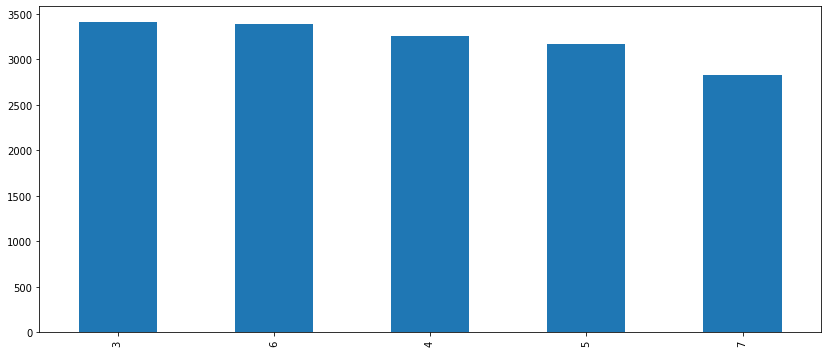

In [14]:
df['film_rental_duration'].value_counts().plot(kind="bar", figsize=(14,6))

### The most common rental rate

The <b>pie plot</b> with all possible rental rates.

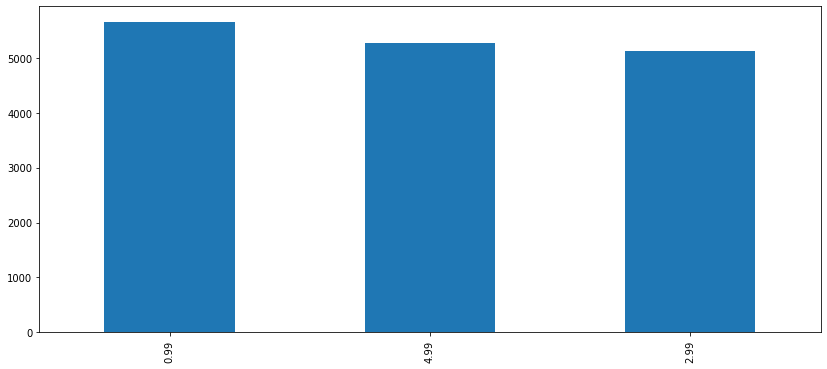

In [15]:
df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))

The <b>bar plot</b> with all possible rental rates.

- Note: The no famous movies have 1/3 of all rents

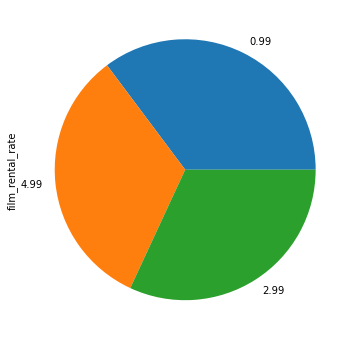

In [16]:
df['film_rental_rate'].value_counts().plot(kind='pie', figsize=(14,6))

### The replacement cost distribute

The <b>box plot</b> of the replacement costs.

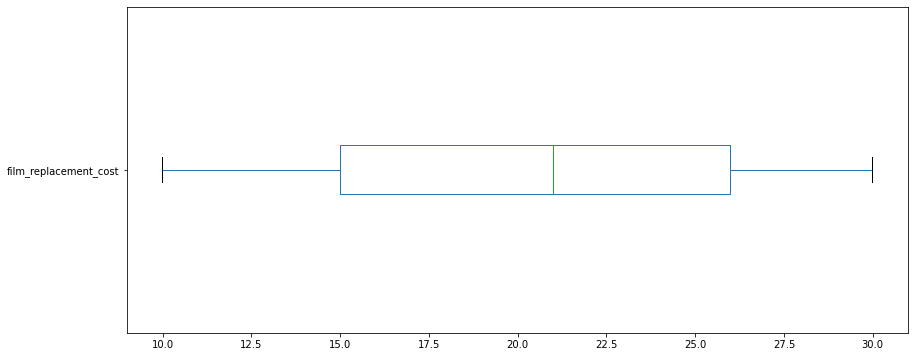

In [17]:
df['film_replacement_cost'].plot(kind='box', vert=False, figsize=(14,6))

The <b>density plot</b> of the replacement costs.
- The red line is the <b>mean</b>.
- The green line is the <b>median</b>.
- Note: The mean of the film replacement cost is $21
- Note: Cheap films and expensive films have almost the same distribution

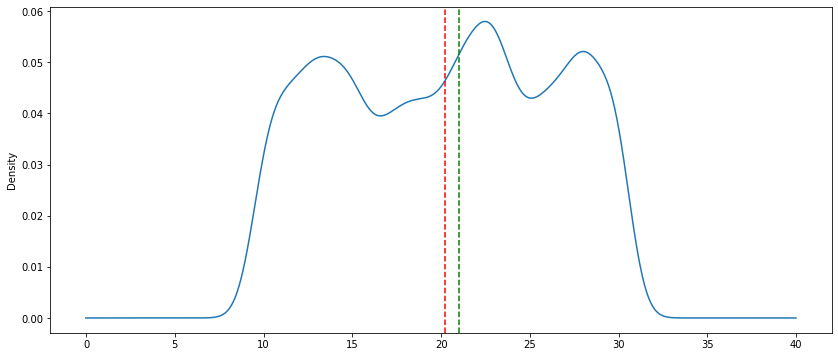

In [18]:
rc = df['film_replacement_cost'].plot(kind='density', figsize=(14,6))
rc.axvline(df['film_replacement_cost'].mean(), color='r', linestyle='--')
rc.axvline(df['film_replacement_cost'].median(), color='green', linestyle='--')
rc

### Films of each rating

In [19]:
df['film_rating'].value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

- The <b>bar plot</b> with all possible film ratings.

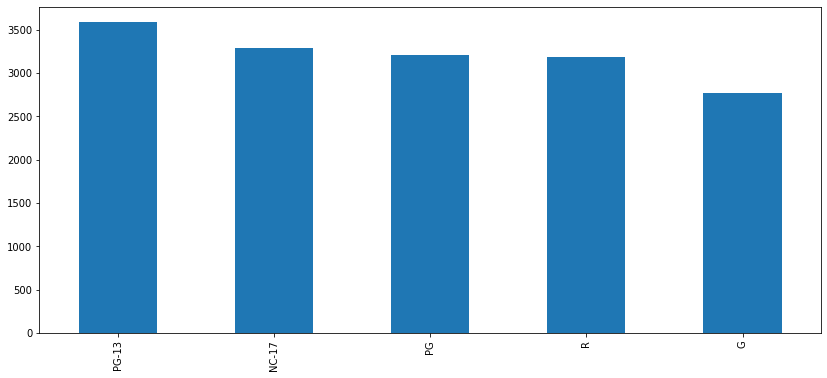

In [20]:
df['film_rating'].value_counts().plot(kind="bar", figsize=(14,6))

### Proportionality between the film replacement cost and film rating

The <b>grouped box plot</b> per film rating with the film replacement costs.

- Note: The more restriction the film has, the higher the replacement cost of the film

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


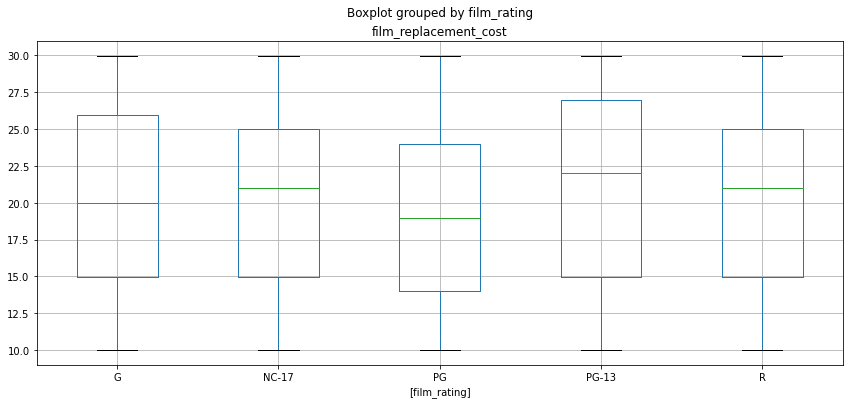

In [21]:
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(14,6))

### Add and calculate a new `rental_days` column

This numeric column has the count of days between `rental_date` and `return_date`.

In [25]:
df["rental_days"] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)
df["rental_days"].head()

rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

### The distribution of `rental_days`

- Plot <b>density (KDE)</b> of `rental_days` wit its mean.

- Note: the max time the people have a film is 10 days and in average is 5 days

In [26]:
df["rental_days"].mean()

4.525944139713763

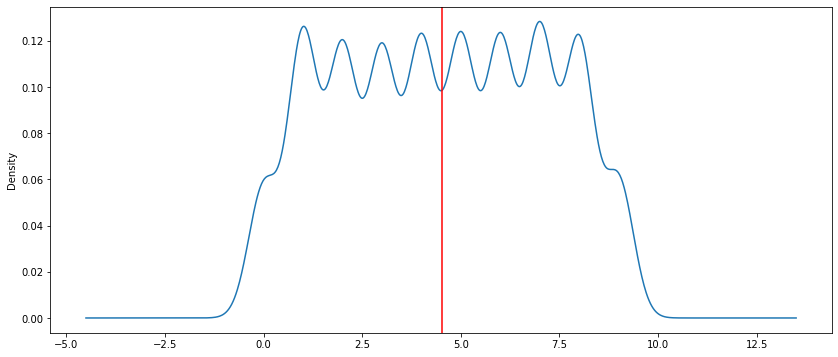

In [31]:
ax = df["rental_days"].plot(kind="kde", figsize=(14,6))
ax.axvline(df["rental_days"].mean(), color="red")

### Add and calculate a new `film_daily_rental_rate` column

This value should be the division of `film_rental_rate` by `film_rental_duration`.

In [ ]:
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']

df['film_daily_rental_rate'].head()

### Analyze the distribution of `film_daily_rental_rate`

- Calculate the mean of `film_daily_rental_rate`.
- Show a <b>density (KDE)</b> of `film_daily_rental_rate`.

In [ ]:
# your code goes here


In [ ]:
df['film_daily_rental_rate'].mean()

In [ ]:
# your code goes here


In [ ]:
ax = df['film_daily_rental_rate'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_daily_rental_rate'].mean(), color='red')

### List 10 films with the lowest daily rental rate

In [ ]:
# your code goes here


In [ ]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()].head(10)

### List 10 films with the highest daily rental rate

In [ ]:
# your code goes here


In [ ]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].max()].head(10)

### How many rentals were made in Lethbridge city?

In [ ]:
# your code goes here


In [ ]:
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

### How many rentals of each film rating were made in Lethbridge city?

Show a <b>bar plot</b> with each film rating count.

In [ ]:
# your code goes here


In [ ]:
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts()

In [ ]:
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts().plot(kind='bar', figsize=(14,6))

### How many rentals were made in Woodridge city with rental duration higher than 5 days?

In [ ]:
# your code goes here


In [ ]:
df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)].shape[0]

### How many rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD?

In [ ]:
# your code goes here


In [ ]:
df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)].shape[0]